# Content

# Project Content

1. [Introduction](#1)
    * 1.1 [Examining the Project Topic](#2)
    * 1.2 [Recognizing Variables In Dataset](#3)

2. [First Organization](#4)
    * 2.1 [Required Python Libraries](#5)
    * 2.2 [Loading the Dataset](#6)
    * 2.3.[Initial analysis on the dataset](#7)

3. [Preparation for Exploratory Data Analysis (EDA)](#8)
    * 3.1 [Examining Missing Values](#9)
    * 3.2 [Examining Unique Values](#10)
    * 3.3 [Examining Statistics of Variables](#11)

4. [Exploratory Data Analysis(EDA)](#12)
    * 4.1 [Uni-variate Analysis](#13)
    * 4.2 [Bi-variate Analysis](#14)
    * 4.3 [Label Encoding](#15)
    * 4.4 [Relationship Between Variables](#16)
    * 4.5 [Outliers](#17)
    * 4.6 [Principal Component Analysis](#18)
5. [References](#19)

# 1. Introduction<a name = 1></a>

## 1.1 Examining the Project Topic<a name = 2></a>
This project aims to construct a robust ML model to predict the likehood of cancer breast. It is based on the original paper<sup><a href="#ref1">[1]</a></sup>

Dataset: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

## 1.2 Recognizing Variables In Dataset<a name = 3></a>

**Attribute Information:**

1. ID number
2. Diagnosis (M = malignant, B = benign)

**Ten real-valued features are computed for each cell nucleus:**

1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

**Class distribution: 357 benign, 212 malignant**

# 2. First Organization<a name = 4></a>

## 2.1 Required Python Libraries<a name =5><a/>

In [ ]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2.2 Loading the Dataset<a name =6><a/>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"stefani09","key":"d787bc27a2362f99877d2a3f791546b7"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#download dataset
! kaggle datasets download -d uciml/breast-cancer-wisconsin-data

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 41.9MB/s]


In [ ]:
#unzip file
!unzip breast-cancer-wisconsin-data.zip

Archive:  breast-cancer-wisconsin-data.zip
  inflating: data.csv                


## 2.3 Initial Analysis on the Dataset<a name =7><a/>

In [ ]:
#load data on dataframe
df = pd.read_csv('/content/data.csv')

In [ ]:
#display dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df.shape

(569, 33)

# 3. Preparation for Exploratory Data Analysis (EDA)<a name = 8></a>

## 3.1 Examining Missing Values<a name = 9></a>

In [ ]:
#count number of null(empty) values
df.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

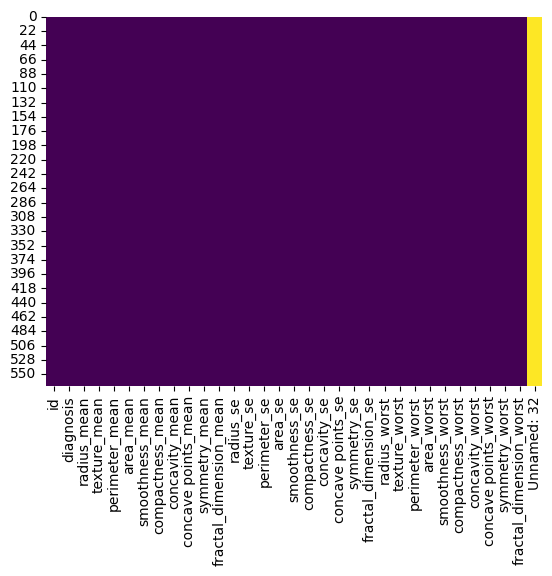

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis');

In [ ]:
# Drop the column with null values
df.drop('Unnamed: 32', axis=1, inplace=True)

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# count of rows and columns
df.shape

(569, 32)

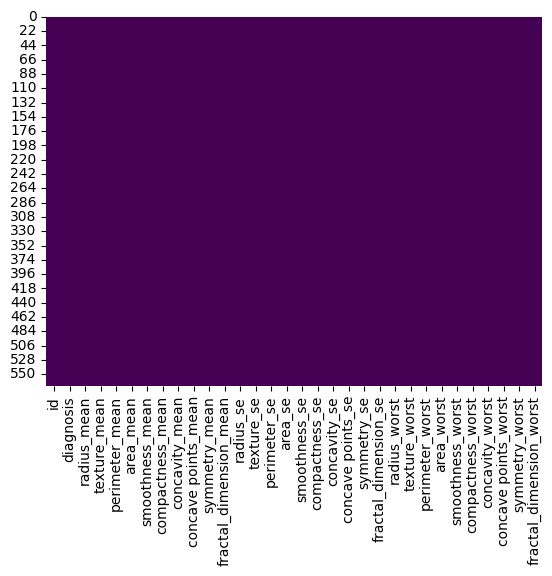

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis');

In [ ]:
df.duplicated().sum()

0

## 3.2 Examining Unique Values<a name = 10></a>

In [ ]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
id,569
diagnosis,2
radius_mean,456
texture_mean,479
perimeter_mean,522
area_mean,539
smoothness_mean,474
compactness_mean,537
concavity_mean,537
concave points_mean,542


From here we can observe that all the features can be considered as numerical variables and only the diagnosis features a binary outcome.

In [ ]:
#Get count of number of M or B cells in diagnosis
count = df['diagnosis'].value_counts()
print(count)

B    357
M    212
Name: diagnosis, dtype: int64


## 3.3 Examining Statistics of Variables<a name = 11></a>

In [ ]:
#count of rows and columns
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


- The dataset has 569 entries (rows) and 33 columns.
- All columns except for the Unnamed: 32 column have non-null values.
- The Unnamed: 32 column seems to contain only null values (NaN) and might be a redundant column.
- The diagnosis column contains categorical values (either 'M' for malignant or 'B' for benign).
- The rest of the columns are mostly numerical and provide various measurements related to the cells.

# 4. Exploratory Data Analysis (EDA) <a name = 12></a>

## 4.1 Uni-variate Analysis<a name = 13></a>

**TARGET**

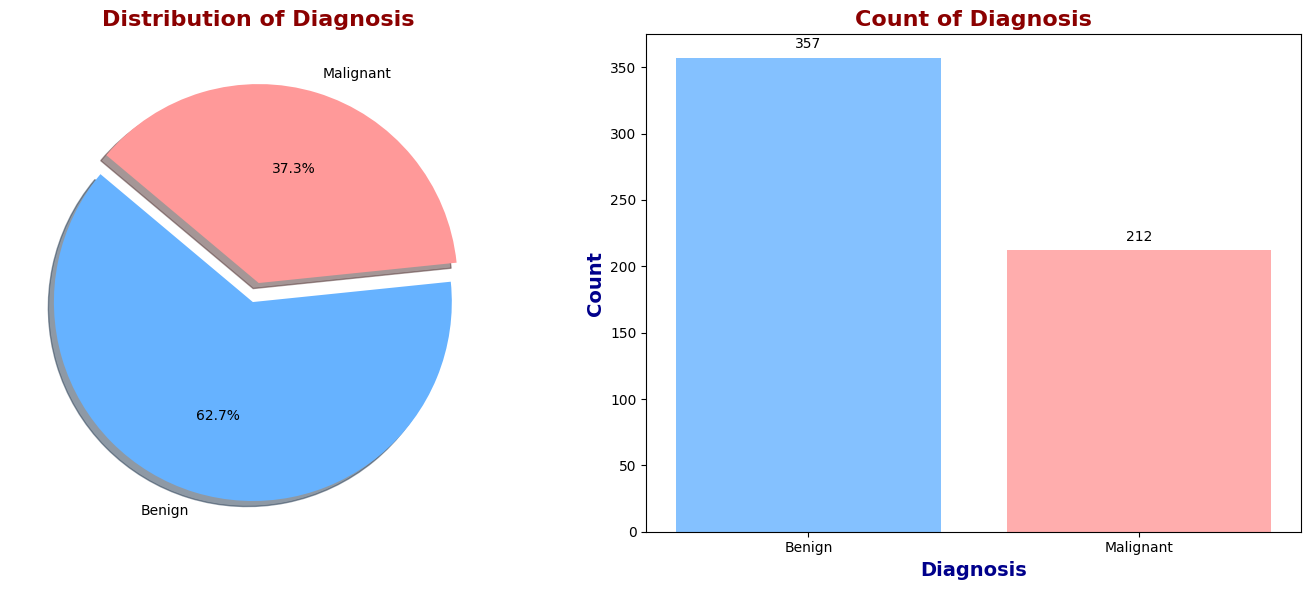

In [ ]:
title_font = {"color" : "darkred", "weight" : "bold", "size" : 16}
axis_font = {"color" : "darkblue", "weight" : "bold", "size" : 14}

# Colors and labels
colors = ['#66b2ff', '#ff9999']
labels = ['Benign', 'Malignant']
explode = (0.1, 0)  # explode 1st slice for better visualization
outcome_counts = df['diagnosis'].value_counts()

# Create a new figure for the plots
plt.figure(figsize=(14, 6))

# Pie Chart
plt.subplot(1, 2, 1)
plt.pie(outcome_counts, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Distribution of Diagnosis', fontdict=title_font)

# Bar Chart
plt.subplot(1, 2, 2)
bars = plt.bar(outcome_counts.index, outcome_counts.values, color=colors, alpha=0.8)
plt.title('Count of Diagnosis', fontdict=title_font)
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])
plt.ylabel('Count', fontdict=axis_font)
plt.xlabel('Diagnosis', fontdict=axis_font)

# Add counts on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, str(int(height)),
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

We can see that there are more Benign cases than Malignant ones. This gives us an idea of the class distribution in our target variable.

**FEATURES**

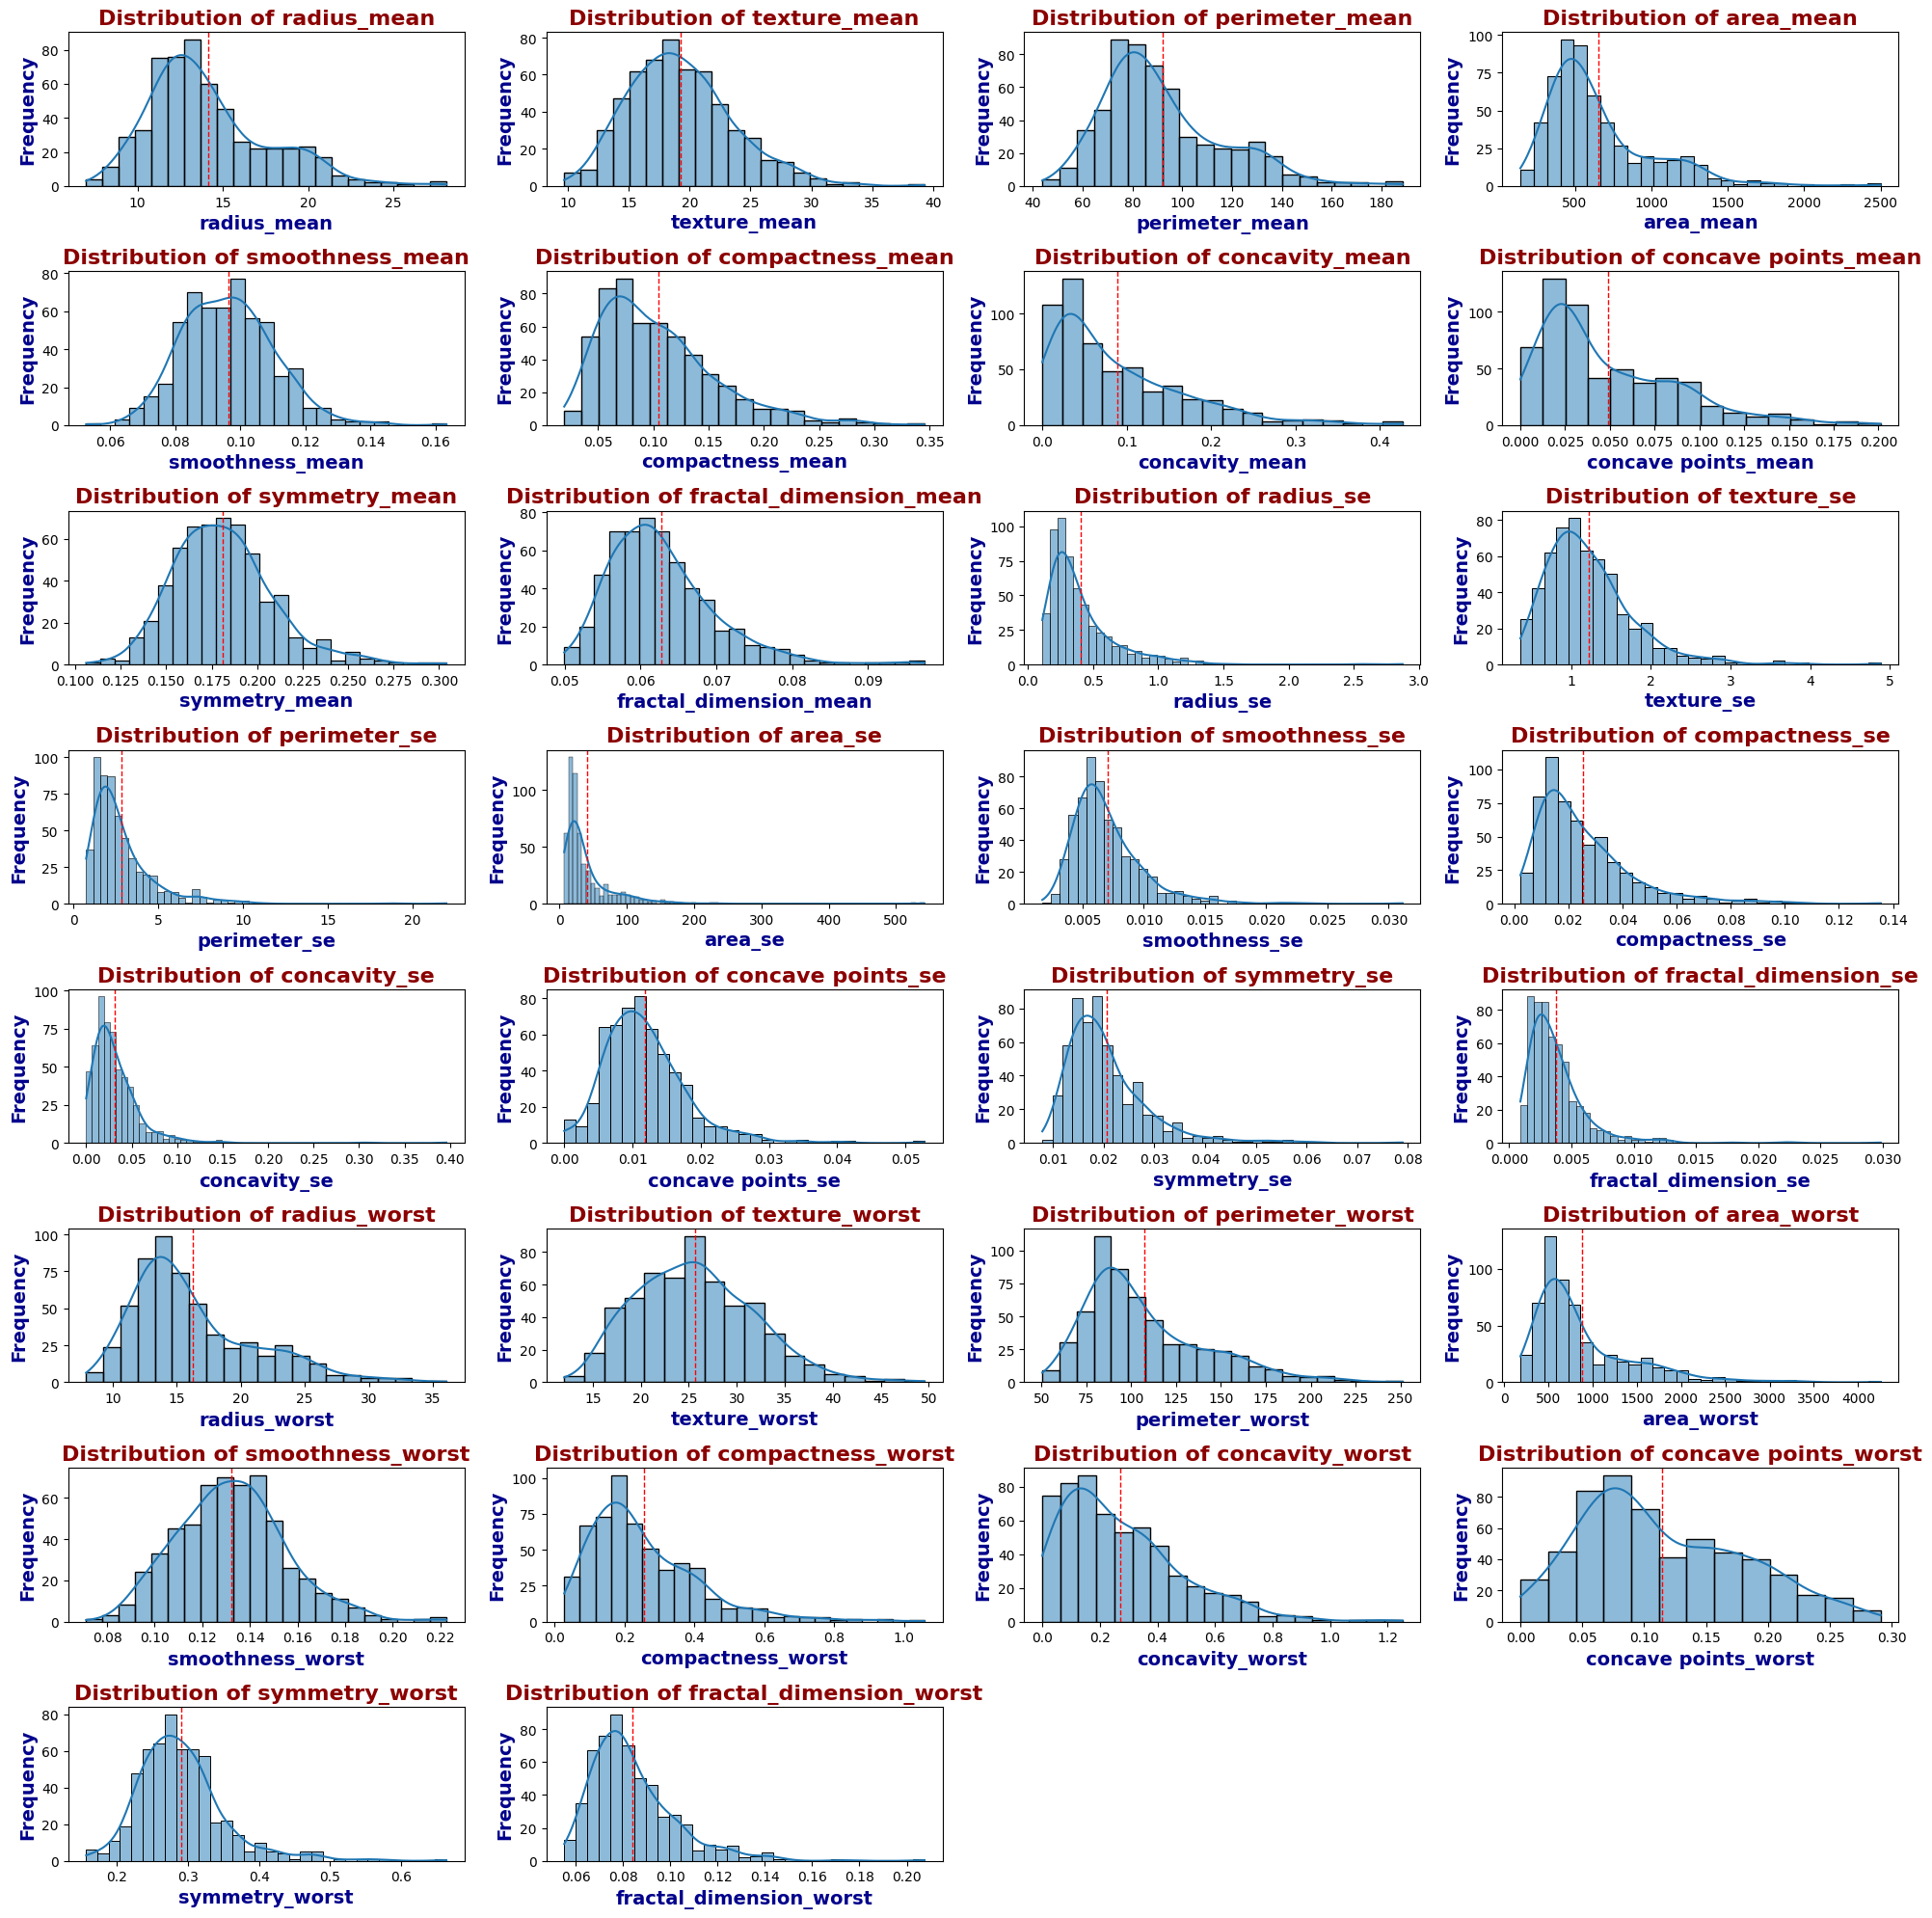

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Exclude 'id' and 'diagnosis' columns
selected_columns = df.columns[2:]

# Plot distributions for each selected column
for i, col in enumerate(selected_columns, 1):
    plt.subplot(8, 4, i)
    sns.histplot(df[col], kde=True)

    # Plot the mean line since all remaining columns are numeric
    plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=1)  # Mean

    plt.title(f'Distribution of {col}', fontdict=title_font)
    plt.xlabel(col, fontdict=axis_font)
    plt.ylabel('Frequency', fontdict=axis_font)

# Adjust layout
plt.tight_layout()
plt.show()

**mean Features:**

- radius_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, and concave points_mean: Right-skewed distributions, suggesting most cell nuclei have smaller average sizes, but there are some with larger sizes.
- texture_mean: Appears approximately normally distributed, centering around the 20 value.
- symmetry_mean: Slightly right-skewed.
- fractal_dimension_mean: Left-skewed, meaning most cell nuclei have a higher average fractal dimension.

**se (Standard Error) Features:**

- Most of the se features have right-skewed distributions.
- The peaks in the histograms for these features (like radius_se, texture_se, and perimeter_se) indicate where the majority of the data points lie.

**worst Features:**

- radius_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, and concave points_worst: Right-skewed distributions.
- texture_worst: More or less normally distributed but slightly right-skewed.
- fractal_dimension_worst: Slightly right-skewed, with most of the data centering around the median value.

## 4.2 Bi-variate Analysis<a name = 14></a>

In [ ]:
# Extracting columns with '_mean' suffix for univariate analysis
mean_columns = [col for col in df.columns if '_mean' in col]

# Selecting the '_mean' features and the 'diagnosis' column for the pair plot
subset_data = df[mean_columns + ['diagnosis']]

# Setting up the colors for the pairplot
colors = ['#66b2ff', '#ff9999']

# Creating the pairplot
graph = sns.pairplot(subset_data, diag_kind='kde', hue='diagnosis', palette=colors)
graph.map_lower(sns.kdeplot, levels=4, color='.2')

plt.show()

Output hidden; open in https://colab.research.google.com to view.

mean Features:

- Diagonal Plots (KDE): These plots confirm our earlier univariate analysis. Features related to size (like radius_mean, perimeter_mean, and area_mean) show right-skewed distributions.
- Bivariate Relationships: The scatter plots show strong linear relationships between features that measure size, such as radius_mean vs. perimeter_mean. Clear clusters are also evident based on the diagnosis, especially for features like radius_mean and concave points_mean.

<Figure size 1500x1500 with 0 Axes>

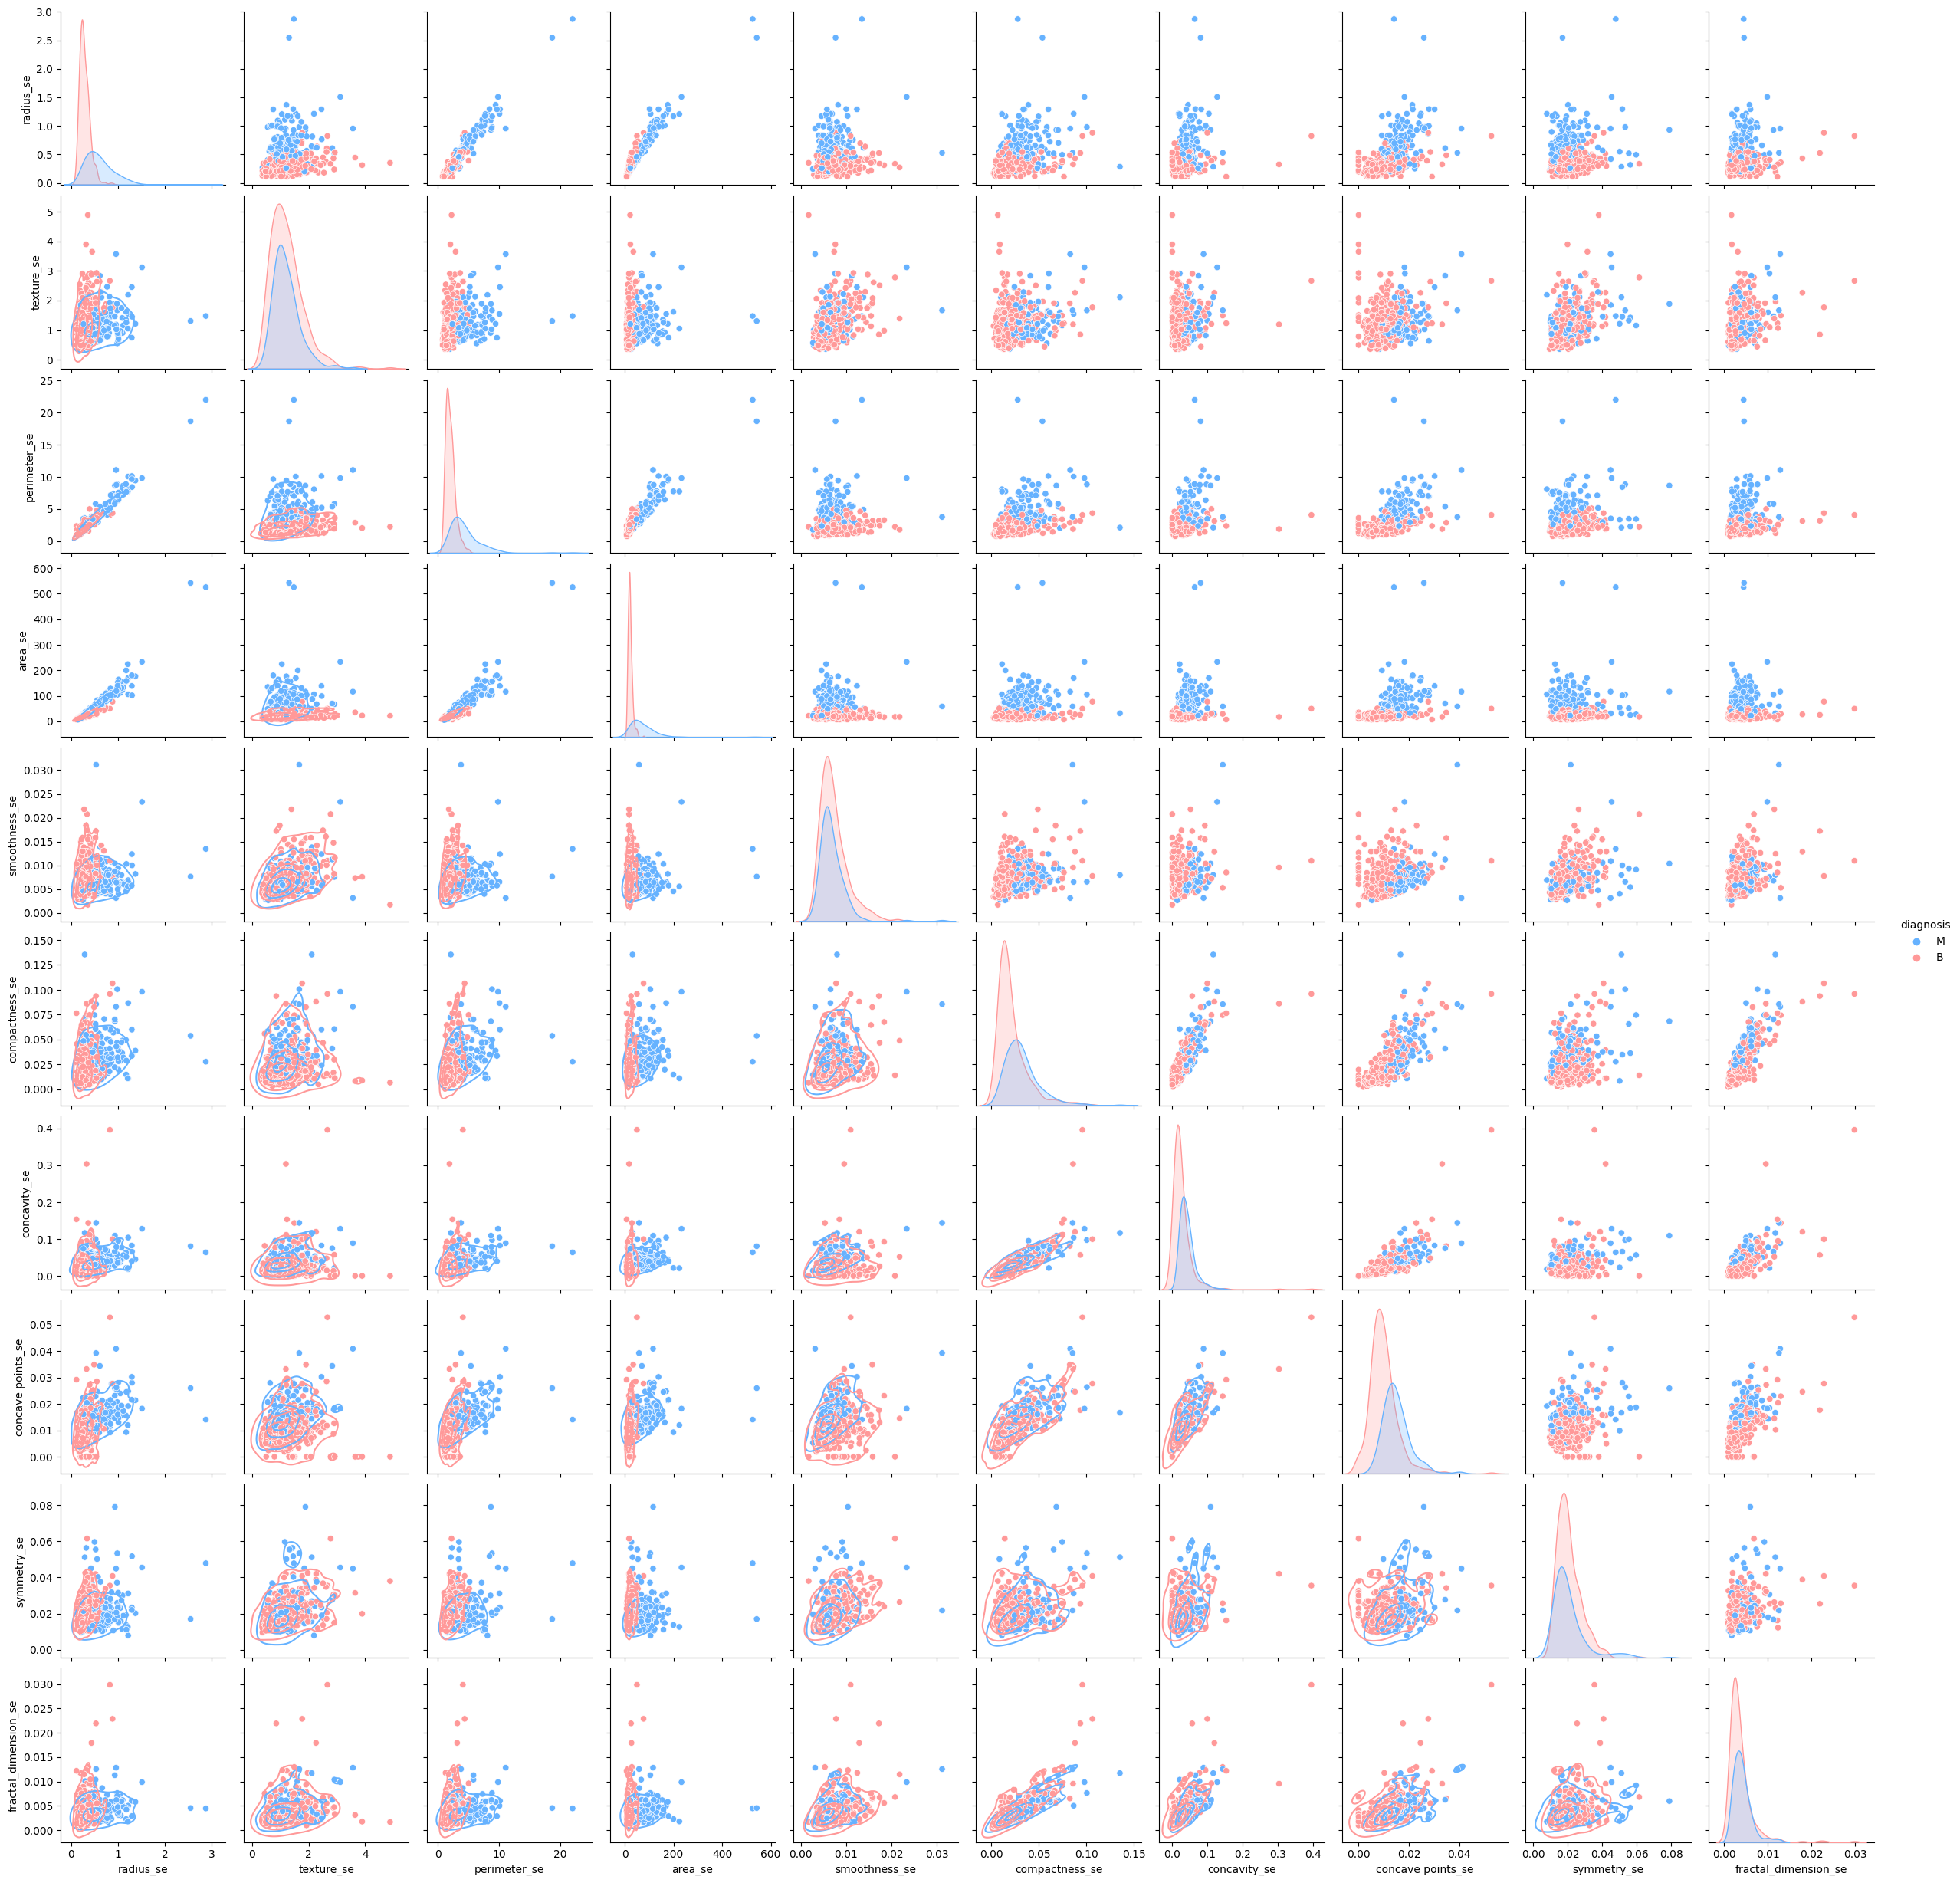

In [ ]:
# Extracting columns with '_se' suffix for univariate analysis
se_columns = [col for col in df.columns if '_se' in col]

# Plotting the distributions of the '_se' features
plt.figure(figsize=(15, 15))

graph_se = sns.pairplot(df[se_columns + ['diagnosis']], diag_kind='kde', hue='diagnosis', palette=colors)
graph_se.map_lower(sns.kdeplot, levels=4, color='.2')

plt.show()

se (Standard Error) Features:

- Diagonal Plots (KDE): The features display right-skewed distributions.
- Bivariate Relationships: Some features, like radius_se vs. perimeter_se, show strong linear relationships. However, the distinction between benign and malignant diagnoses is less pronounced in these scatter plots compared to the _mean features.

In [ ]:
# Extracting columns with '_worst' suffix for univariate analysis
worst_columns = [col for col in df.columns if '_worst' in col]

# Plotting the distributions of the '_worst' features
plt.figure(figsize=(15, 15))

graph_worst = sns.pairplot(df[worst_columns + ['diagnosis']], diag_kind='kde', hue='diagnosis', palette=colors)
graph_worst.map_lower(sns.kdeplot, levels=4, color='.2')

plt.show()

Output hidden; open in https://colab.research.google.com to view.

worst Features:

- Diagonal Plots (KDE): The distributions align with our univariate analysis, with features related to size being right-skewed.
- Bivariate Relationships: There's a strong linear correlation between size-related features, similar to the _mean group. The distinction between benign and malignant diagnoses is evident.

## 4.3 Label Encoding<a name = 15></a>

In [ ]:
#Get Datatypes of each column in our dataset
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
#Encode the diagnosis values
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [ ]:
#display df
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.to_csv('data_label_encoded.csv', index=False)

## 4.4 Relationship Between Variables<a name = 16></a>

In [ ]:
correlation_matrix = df.drop(columns=['id']).corr()

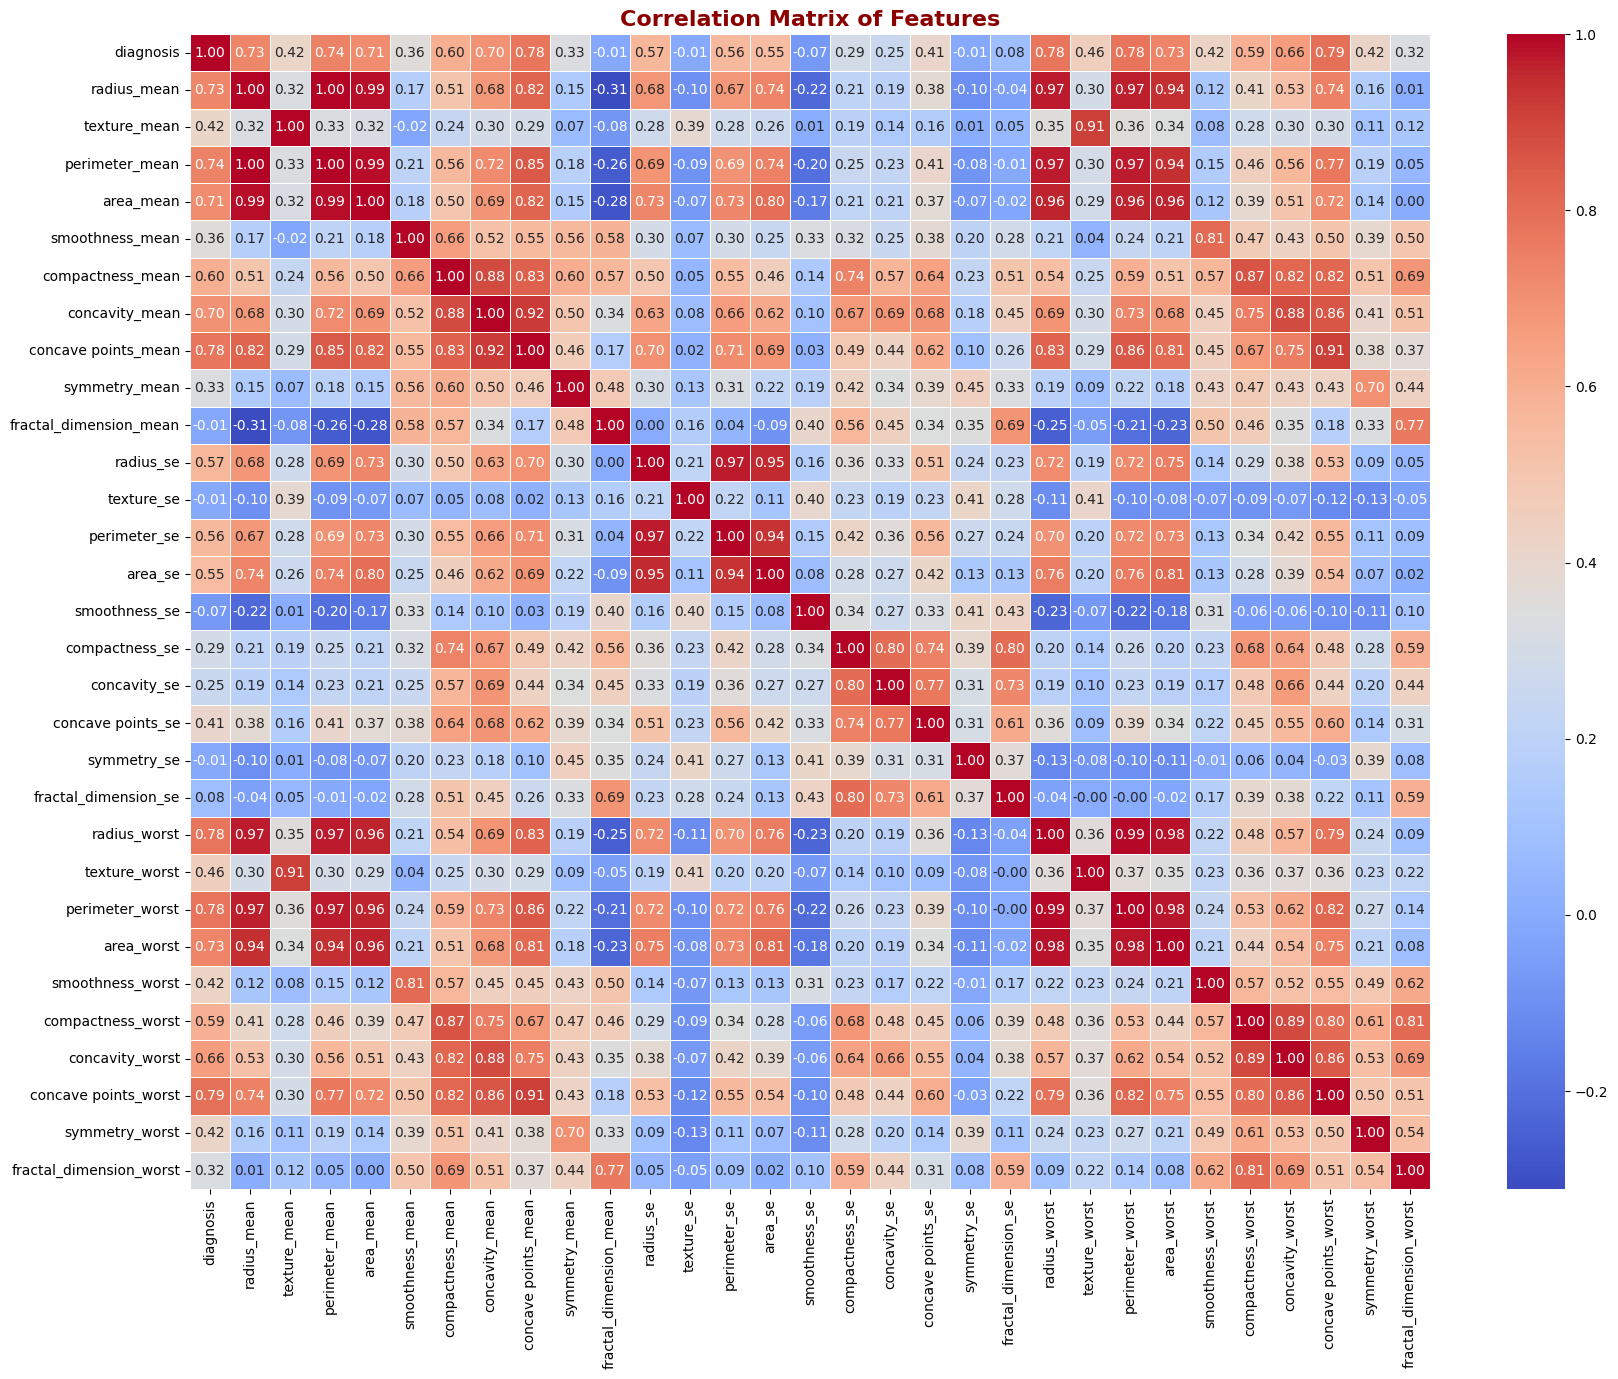

In [150]:
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features', fontdict=title_font)
plt.show()

- The diagnosis column (now in binary format) shows varying degrees of correlation with the features. Some features, such as radius_mean, perimeter_mean, area_mean, and others, exhibit strong positive correlations with diagnosis. This suggests that as these feature values increase, the likelihood of the diagnosis being malignant (1) also increases.
- Conversely, some features have negative correlations with diagnosis, though they are generally weaker in magnitude.

**The correlations between features:**
- High correlations between features can lead to multicollinearity in models that assume feature independence, like linear regression. When building predictive models, it might be beneficial to consider feature selection or dimensionality reduction techniques to mitigate multicollinearity.
- Features with strong correlations can be considered as carrying similar information, so one might be dropped in favor of the other to simplify the model without losing much information.

**Two key points:**

- The data has a big number of features which can complicate the subsequent ML modeling.
- High correlations between features can lead to multicollinearity in models that assume feature independence, like linear regression. When building predictive models, it might be beneficial to consider feature selection or dimensionality reduction techniques to mitigate multicollinearity.

## 4.5 Outliers<a name = 17></a>

In the original paper the authors mention that **`"the features are numerically modeled such that larger values will typically indicate a higher likelihood of malignancy"`**. So, outliers might not be relevant for this analysis.

## 4.6 Principal Component Analysis (PCA)<a name = 18></a>

Principal Component Analysis (PCA) is a statistical method used to reduce the dimensionality of data while retaining as much variance as possible. It does this by transforming the original variables into a new set of variables called principal components. These components are orthogonal (uncorrelated), and the first principal component accounts for the largest possible variance in the data. Subsequent components account for decreasing amounts of variance, and they are all orthogonal to each other. PCA is a very flexible tool and allows analysis of datasets that may contain, for example, multicollinearity, missing values, categorical data, and imprecise measurements.<sup><a href="#ref2">[2]</a></sup>

**When to Use:**

 - When you have a high-dimensional dataset and want to reduce its dimensionality for visualization or analysis.
 - When you want to identify patterns in data.
- When you want to remove multicollinearity in regression models.

**Advantages:**

- Reduces the dimensionality of data, making it easier to visualize and analyze.
- Removes multicollinearity.
- Can lead to more interpretable results in some cases.
- Reduces the computational cost for some algorithms.

**Disadvantages:**

- Loss of some information due to dimensionality reduction.
- Results can sometimes be hard to interpret.
- Assumes linear relationships among variables.
- Not always suitable for datasets where observations are related to each other in complex, non-linear ways.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Extracting features
features = df.drop(columns=['id', 'diagnosis'])

In [ ]:
# Standarizing the features
standardized_features = StandardScaler().fit_transform(features)

In [ ]:
# Applying PCA
pca = PCA()
principal_components = pca.fit_transform(standardized_features)

In [ ]:
# Explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

explained_variance_ratio_cumsum = explained_variance_ratio.cumsum()

To understand how much variance each principal component explains and decide how many components to retain.

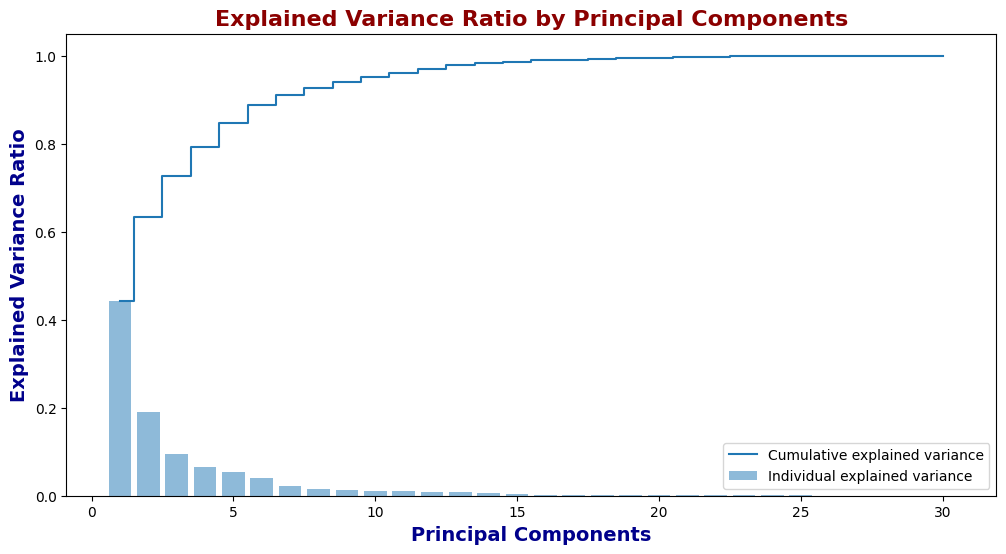

In [ ]:
# Plotting the explained variance
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, label='Individual explained variance')
plt.step(range(1, len(explained_variance_ratio_cumsum) + 1), explained_variance_ratio_cumsum, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio', fontdict=axis_font)
plt.xlabel('Principal Components', fontdict=axis_font)
plt.legend(loc='best')
plt.title('Explained Variance Ratio by Principal Components', fontdict=title_font)
plt.show()

- The bars represent the individual explained variance by each component.
- The step line represents the cumulative explained variance.

1. The first few principal components capture a significant portion of the variance in the data.
2. The first principal component alone explains over 40% of the variance, and the first two components combined explain nearly 60%.
3. By the time we reach around the 7th component, we've captured over 90% of the total variance in the dataset.

In [ ]:
import numpy as np

# Computing the number of components that explain at least 95% of the variance
num_components_95 = np.where(explained_variance_ratio_cumsum >= 0.95)[0][0] + 1  # +1 because indexing starts from 0
num_components_95

10

In [ ]:
# Instantiating the PCA object with 10 components and applying it
pca_10 = PCA(n_components=10)
principal_components_10 = pca_10.fit_transform(standardized_features)

# Defining the column names for the transformed DataFrame
columns_10 = [f"PC{i+1}" for i in range(10)]

# Storing the transformed data into a new DataFrame
df_pca_10 = pd.DataFrame(principal_components_10, columns=columns_10)
df_pca_10.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159369,-0.398403,-0.157120,-0.877416
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013359,0.240988,-0.711902,1.106986
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097370,0.024063,0.454312
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429912,1.059559,-1.405443,-1.116920
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636378,-0.263806,0.377697


In [ ]:
df_pca_10.to_csv('data_pca_10.csv', index=False)

# 5. References<a name = 19></a>

<ol>
    <li id="ref1"><a href="https://doi.org/10.1117/12.148698" target="_blank">Proceedings Volume 1905, Biomedical Image Processing and Biomedical Visualization; 29 July 1993. "Nuclear feature extraction for breast tumor diagnosis". W. Nick Street, W. H. Wolberg, O. L. Mangasarian.</a></li>
    <li id="ref2"><a href="https://doi.org/10.1016/j.chemolab.2021.104304" target="_blank">Chemometrics and Intelligent Laboratory Systems. Volume 213, 15 June 2021. "Efficient tools for principal component analysis of complex data— a tutorial". O. Rodionova, S. Kucheryavskiy, Alexey Pomerantsev.</a></li>
</ol>